In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the datasets
file_paths = [
    'Dataset 1_EV charging reports_cleaned.csv',
    'Dataset 2_Hourly EV loads - Per user_cleaned.csv',
    'Dataset 3a_Hourly EV loads - Aggregated private_cleaned.csv',
    'Dataset 3b_Hourly EV loads - Aggregated shared_cleaned.csv',
    'Dataset 5_AMS data from garage Bl2_cleaned.csv',
    'Dataset 6_Local traffic distribution_cleaned.csv',
    'Norway_Trondheim_ExactLoc_Weather.csv'
]

dataframes = [pd.read_csv(file) for file in file_paths]

# Select Dataset 2 for prediction
ev_loads_per_user = dataframes[1]

# Preprocessing steps
# Convert date_from and date_to to datetime objects
ev_loads_per_user['date_from'] = pd.to_datetime(ev_loads_per_user['date_from'], format='%d.%m.%Y %H:%M')
ev_loads_per_user['date_to'] = pd.to_datetime(ev_loads_per_user['date_to'], format='%d.%m.%Y %H:%M')

# Convert load columns to numeric values (handling commas and converting to float)
load_columns = ['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']
for column in load_columns:
    ev_loads_per_user[column] = ev_loads_per_user[column].str.replace(',', '.').astype(float)

# Handle missing values by filling them with 0
ev_loads_per_user[load_columns] = ev_loads_per_user[load_columns].fillna(0)

# Aggregating data by hour
ev_loads_per_hour = ev_loads_per_user.groupby('date_from').sum().reset_index()

# Define the target variable (total load as the sum of all load columns)
ev_loads_per_hour['total_load'] = ev_loads_per_hour[load_columns].sum(axis=1)

# Select features and target
features = ev_loads_per_hour[['date_from'] + load_columns]
target = ev_loads_per_hour['total_load']

# Normalize the data
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features[load_columns])
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

# Create sequences for LSTM (using a window of 24 hours)
def create_sequences(data, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

window_size = 24
X, y = create_sequences(features_scaled, target_scaled, window_size)

TypeError: datetime64 type does not support sum operations

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(window_size, X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)

In [ ]:
# Display training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

print(f"Test Loss: {loss}")

In [8]:
pip install tensorflow

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/377.0 MB 7.3 MB/s eta 0:00:52
   ---------------------------------------- 0.5/377.0 MB 6.4 MB/s eta 0:00:59
   ---------------------------------------- 0.8/377.0 MB 6.7 MB/s eta 0:00:56
   ---------------------------------------- 1.2/377.0 MB 6.9 MB/s eta 0:00:55
   ---------------------------------------- 1.6/377.0 MB 7.2 MB/s eta 0:00:53
   ---------------------------------------- 2.0/377.0 MB 7.5 MB/s eta 0:00:51
   ---------------------------------------- 2.5/377.0 MB 7.9 MB/s eta 0:00:48
   ---------------------------------------- 2.8/377.0 MB 7.8 MB/s eta 0:00:49
   ---------------------------------------- 3.2/377.0 MB 7.9 MB/s eta 0:00:48
   ---------------------------------------- 3.6/377.0 MB 8.0 MB/s eta 0:00:

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
!python.exe -m pip install --upgrade pip

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the datasets
file_paths = [
    'Dataset 1_EV charging reports_cleaned.csv',
    'Dataset 2_Hourly EV loads - Per user_cleaned.csv',
    'Dataset 3a_Hourly EV loads - Aggregated private_cleaned.csv',
    'Dataset 3b_Hourly EV loads - Aggregated shared_cleaned.csv',
    'Dataset 5_AMS data from garage Bl2_cleaned.csv',
    'Dataset 6_Local traffic distribution_cleaned.csv',
    'Norway_Trondheim_ExactLoc_Weather.csv'
]

dataframes = [pd.read_csv(file) for file in file_paths]

# Select Dataset 2 for prediction
ev_loads_per_user = dataframes[1]

# Preprocessing steps
# Convert date_from and date_to to datetime objects
ev_loads_per_user['date_from'] = pd.to_datetime(ev_loads_per_user['date_from'], format='%d.%m.%Y %H:%M')
ev_loads_per_user['date_to'] = pd.to_datetime(ev_loads_per_user['date_to'], format='%d.%m.%Y %H:%M')

# Convert load columns to numeric values (handling commas and converting to float)
load_columns = ['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']
for column in load_columns:
    ev_loads_per_user[column] = ev_loads_per_user[column].str.replace(',', '.').astype(float)

# Handle missing values by filling them with 0
ev_loads_per_user[load_columns] = ev_loads_per_user[load_columns].fillna(0)

# Extract hour from 'date_from'
ev_loads_per_user['hour'] = ev_loads_per_user['date_from'].dt.floor('H')

# Aggregating data by hour and summing only the load columns
ev_loads_per_hour = ev_loads_per_user.groupby('hour')[load_columns].sum().reset_index()

# Define the target variable (total load as the sum of all load columns)
ev_loads_per_hour['total_load'] = ev_loads_per_hour[load_columns].sum(axis=1)

# Select features and target
features = ev_loads_per_hour[['hour'] + load_columns]
target = ev_loads_per_hour['total_load']

# Normalize the data
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features[load_columns])
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

# Create sequences for LSTM (using a window of 24 hours)
def create_sequences(data, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

window_size = 24
X, y = create_sequences(features_scaled, target_scaled, window_size)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(window_size, len(load_columns))))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

C:\Users\Administrator\AppData\Local\Temp\ipykernel_27372\641400002.py:39: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ev_loads_per_user['hour'] = ev_loads_per_user['date_from'].dt.floor('H')
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0145 - val_loss: 0.0046
Epoch 2/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 3/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 4/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 5/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 6/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 8/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 9/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0011 - val_loss: 9.7520e-04
Epoch 10/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 11/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0011 - val_loss: 9.2058e-04
Epoch 12/20
244/244 ━━━━━━━━━━━━━

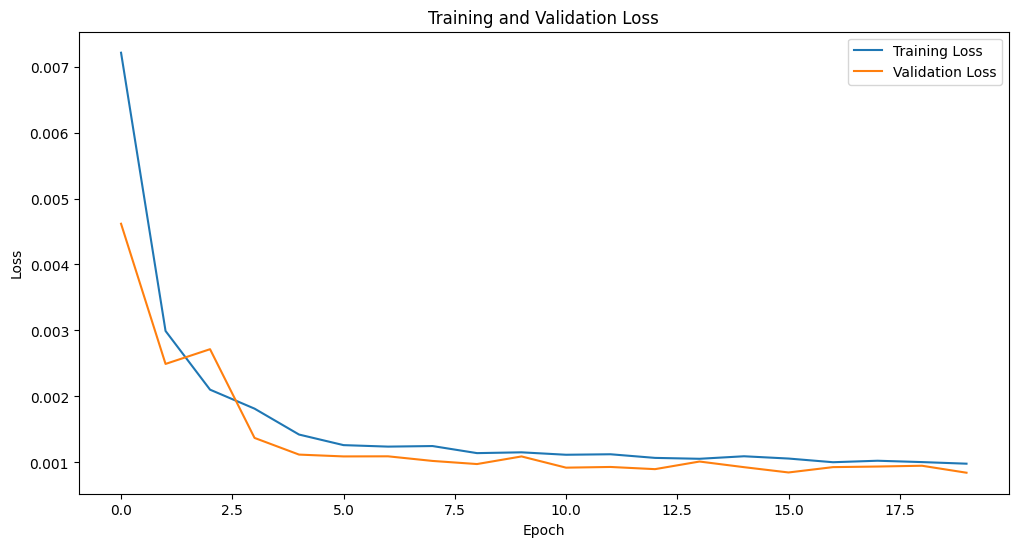

In [11]:
# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


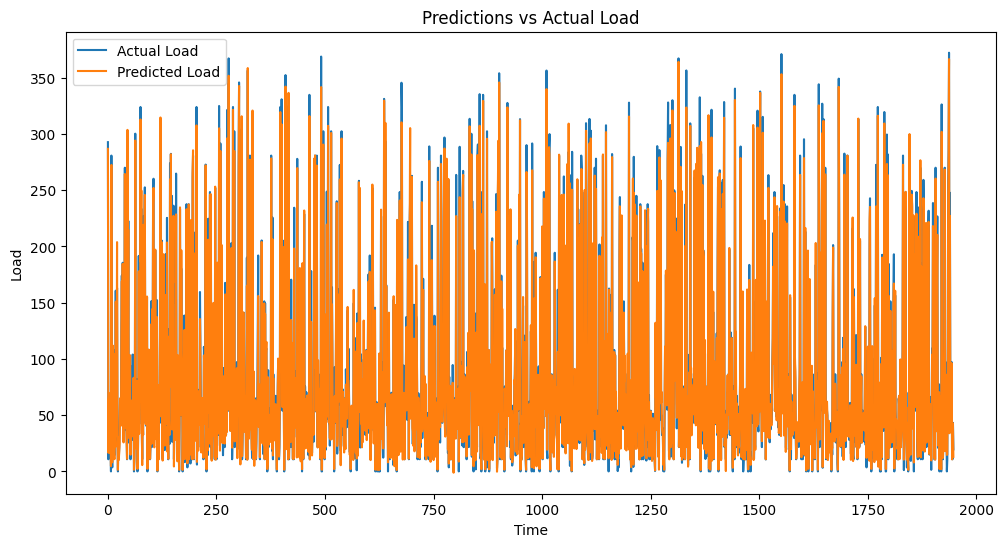

In [12]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)

# Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Load')
plt.plot(predictions, label='Predicted Load')
plt.title('Predictions vs Actual Load')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()
plt.show()

Data Load & Normalization

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import matplotlib.pyplot as plt

# Load the datasets
file_paths = [
    'Dataset 1_EV charging reports_cleaned.csv',
    'Dataset 2_Hourly EV loads - Per user_cleaned.csv',
    'Dataset 3a_Hourly EV loads - Aggregated private_cleaned.csv',
    'Dataset 3b_Hourly EV loads - Aggregated shared_cleaned.csv',
    'Dataset 5_AMS data from garage Bl2_cleaned.csv',
    'Dataset 6_Local traffic distribution_cleaned.csv',
    'Norway_Trondheim_ExactLoc_Weather.csv'
]

dataframes = [pd.read_csv(file) for file in file_paths]

# Select Dataset 2 for prediction
ev_loads_per_user = dataframes[1]

# Preprocessing steps
# Convert date_from and date_to to datetime objects
ev_loads_per_user['date_from'] = pd.to_datetime(ev_loads_per_user['date_from'], format='%d.%m.%Y %H:%M')
ev_loads_per_user['date_to'] = pd.to_datetime(ev_loads_per_user['date_to'], format='%d.%m.%Y %H:%M')

# Convert load columns to numeric values (handling commas and converting to float)
load_columns = ['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']
for column in load_columns:
    ev_loads_per_user[column] = ev_loads_per_user[column].str.replace(',', '.').astype(float)

# Handle missing values by filling them with 0
ev_loads_per_user[load_columns] = ev_loads_per_user[load_columns].fillna(0)

# Extract hour from 'date_from'
ev_loads_per_user['hour'] = ev_loads_per_user['date_from'].dt.floor('h')

# Aggregating data by hour and summing only the load columns
ev_loads_per_hour = ev_loads_per_user.groupby('hour')[load_columns].sum().reset_index()

# Define the target variable (total load as the sum of all load columns)
ev_loads_per_hour['total_load'] = ev_loads_per_hour[load_columns].sum(axis=1)

# Select features and target
features = ev_loads_per_hour[['hour'] + load_columns]
target = ev_loads_per_hour['total_load']

# Normalize the data
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features[load_columns])
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

Sequence & Split test-train

In [14]:
# Create sequences for LSTM (using a window of 24 hours)
def create_sequences(data, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

window_size = 24
X, y = create_sequences(features_scaled, target_scaled, window_size)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Compile and train LSTM model

In [15]:
# Build the LSTM model
model = Sequential()
model.add(Input(shape=(window_size, len(load_columns))))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.0164 - val_loss: 0.0045
Epoch 2/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0039 - val_loss: 0.0023
Epoch 3/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 4/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 5/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 6/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 7/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 8/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0012 - val_loss: 9.8862e-04
Epoch 9/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 11/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0011 - val_loss: 9.5822e-04
Epoch 12/20
244/244 ━━━━━━━━━━━━━

train graph

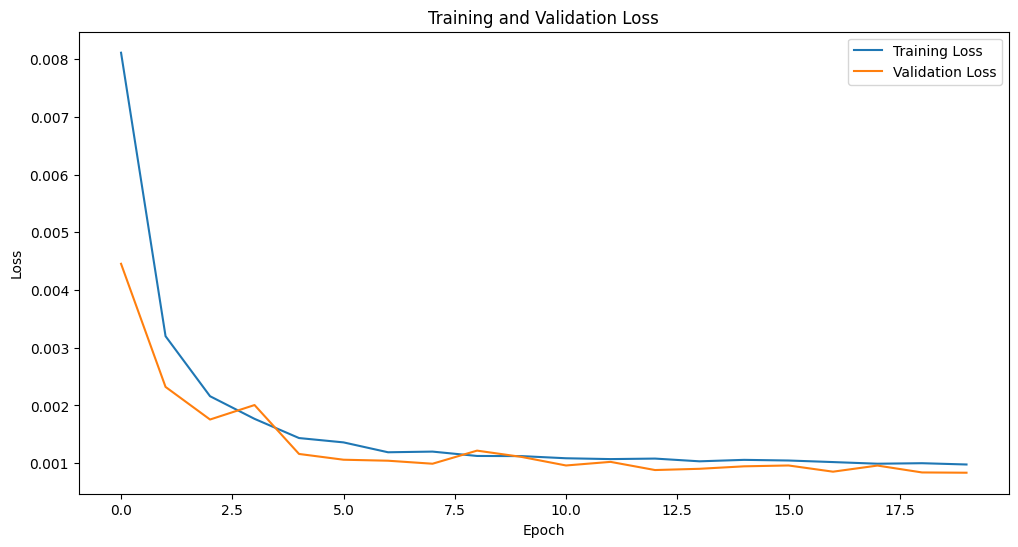

In [16]:
# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Prediction

61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


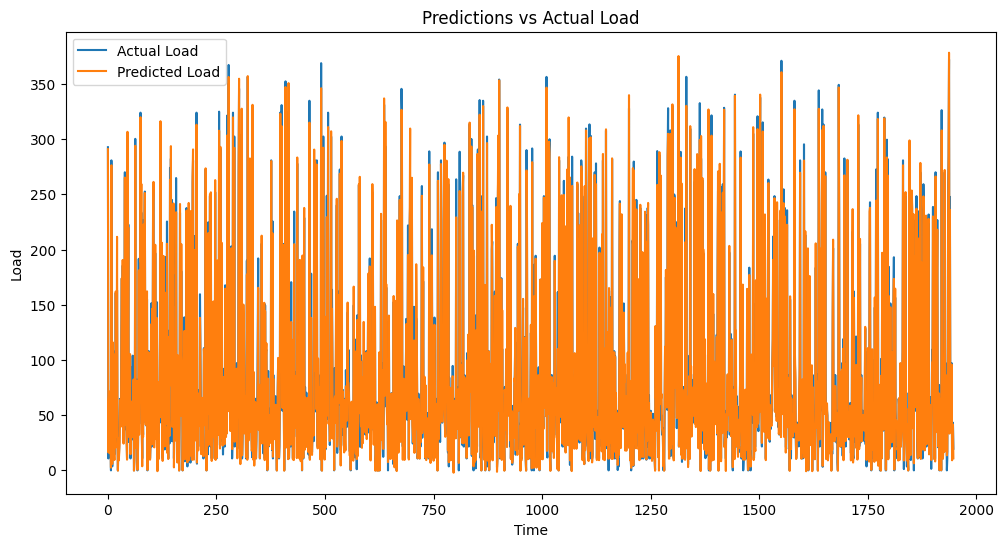

In [17]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)

# Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Load')
plt.plot(predictions, label='Predicted Load')
plt.title('Predictions vs Actual Load')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()
plt.show()

Epoch 1/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0188 - val_loss: 0.0039
Epoch 2/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 3/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 4/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 5/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0013 - val_loss: 9.9951e-04
Epoch 7/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0012 - val_loss: 9.8253e-04
Epoch 8/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 10/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0011 - val_loss: 9.1096e-04
Epoch 11/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0011 - val_loss: 9.6758e-04
Epoch 12/20
244/244 ━━━━━

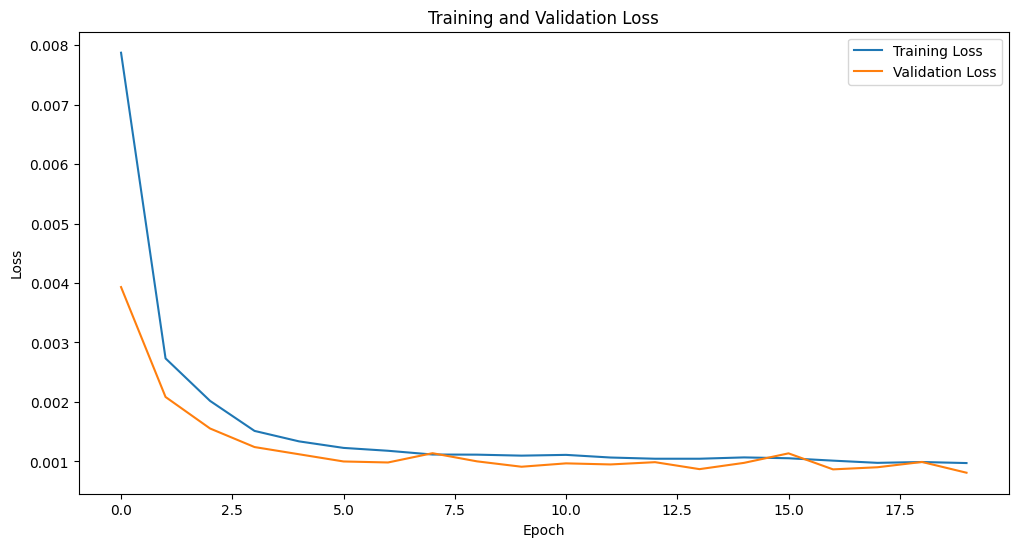

61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Mean Absolute Error (MAE): 7.117427949918539
Mean Squared Error (MSE): 117.44471740706561
Root Mean Squared Error (RMSE): 10.837191398469699
Accuracy: 0.9584188911704312
F1 Score: 0.9323308270676691
Confusion Matrix:
[[1309   21]
 [  60  558]]


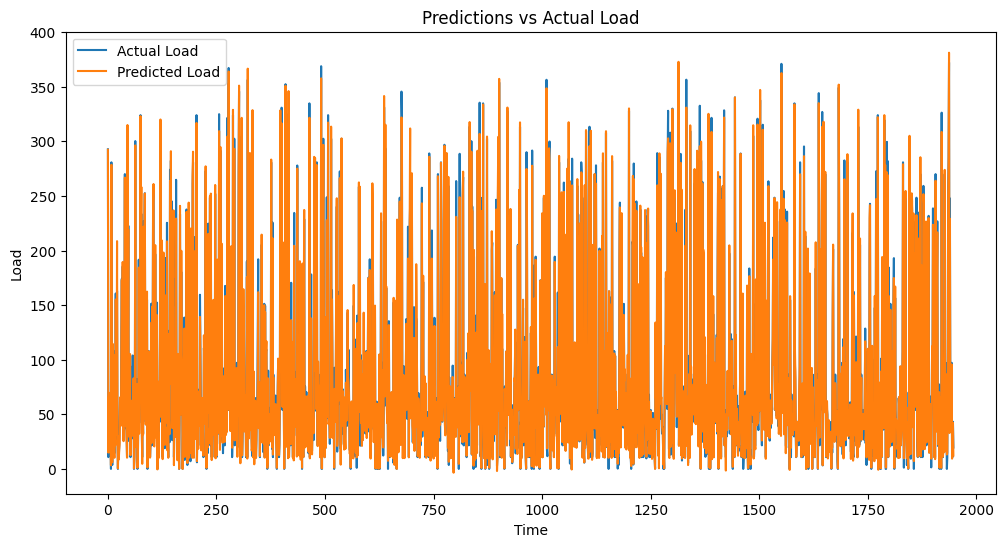

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import matplotlib.pyplot as plt

# Load the datasets
file_paths = [
    'Dataset 1_EV charging reports_cleaned.csv',
    'Dataset 2_Hourly EV loads - Per user_cleaned.csv',
    'Dataset 3a_Hourly EV loads - Aggregated private_cleaned.csv',
    'Dataset 3b_Hourly EV loads - Aggregated shared_cleaned.csv',
    'Dataset 5_AMS data from garage Bl2_cleaned.csv',
    'Dataset 6_Local traffic distribution_cleaned.csv',
    'Norway_Trondheim_ExactLoc_Weather.csv'
]

dataframes = [pd.read_csv(file) for file in file_paths]

# Select Dataset 2 for prediction
ev_loads_per_user = dataframes[1]

# Preprocessing steps
# Convert date_from and date_to to datetime objects
ev_loads_per_user['date_from'] = pd.to_datetime(ev_loads_per_user['date_from'], format='%d.%m.%Y %H:%M')
ev_loads_per_user['date_to'] = pd.to_datetime(ev_loads_per_user['date_to'], format='%d.%m.%Y %H:%M')

# Convert load columns to numeric values (handling commas and converting to float)
load_columns = ['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']
for column in load_columns:
    ev_loads_per_user[column] = ev_loads_per_user[column].str.replace(',', '.').astype(float)

# Handle missing values by filling them with 0
ev_loads_per_user[load_columns] = ev_loads_per_user[load_columns].fillna(0)

# Extract hour from 'date_from'
ev_loads_per_user['hour'] = ev_loads_per_user['date_from'].dt.floor('h')

# Aggregating data by hour and summing only the load columns
ev_loads_per_hour = ev_loads_per_user.groupby('hour')[load_columns].sum().reset_index()

# Define the target variable (total load as the sum of all load columns)
ev_loads_per_hour['total_load'] = ev_loads_per_hour[load_columns].sum(axis=1)

# Select features and target
features = ev_loads_per_hour[['hour'] + load_columns]
target = ev_loads_per_hour['total_load']

# Normalize the data
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features[load_columns])
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

# Create sequences for LSTM (using a window of 24 hours)
def create_sequences(data, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

window_size = 24
X, y = create_sequences(features_scaled, target_scaled, window_size)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(window_size, len(load_columns))))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)

# Calculate regression evaluation metrics
mae = mean_absolute_error(y_test_actual, predictions)
mse = mean_squared_error(y_test_actual, predictions)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Convert regression outputs to binary classification
threshold = np.mean(y_test_actual)
y_test_class = (y_test_actual > threshold).astype(int)
predictions_class = (predictions > threshold).astype(int)

# Calculate classification metrics
accuracy = accuracy_score(y_test_class, predictions_class)
f1 = f1_score(y_test_class, predictions_class)
conf_matrix = confusion_matrix(y_test_class, predictions_class)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

# Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Load')
plt.plot(predictions, label='Predicted Load')
plt.title('Predictions vs Actual Load')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()
plt.show()


Epoch 1/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0139 - val_loss: 0.0035
Epoch 2/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 3/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 4/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 5/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 6/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 7/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 8/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 9/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 10/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0011 - val_loss: 9.2341e-04
Epoch 11/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0010 - val_loss: 9.4352e-04
Epoch 12/20
244/244 ━━━━━━━━━━━━━

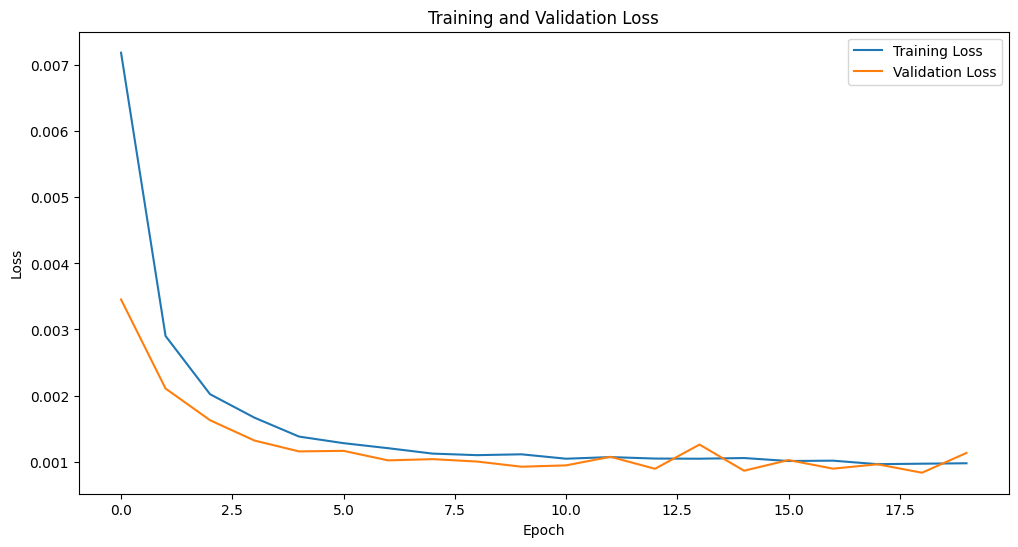

61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Mean Absolute Error (MAE): 8.476445693839954
Mean Squared Error (MSE): 164.05465654103958
Root Mean Squared Error (RMSE): 12.808382276503133
Accuracy: 0.9481519507186859
F1 Score: 0.9448388858547242
Confusion Matrix:
[[982  30]
 [ 71 865]]


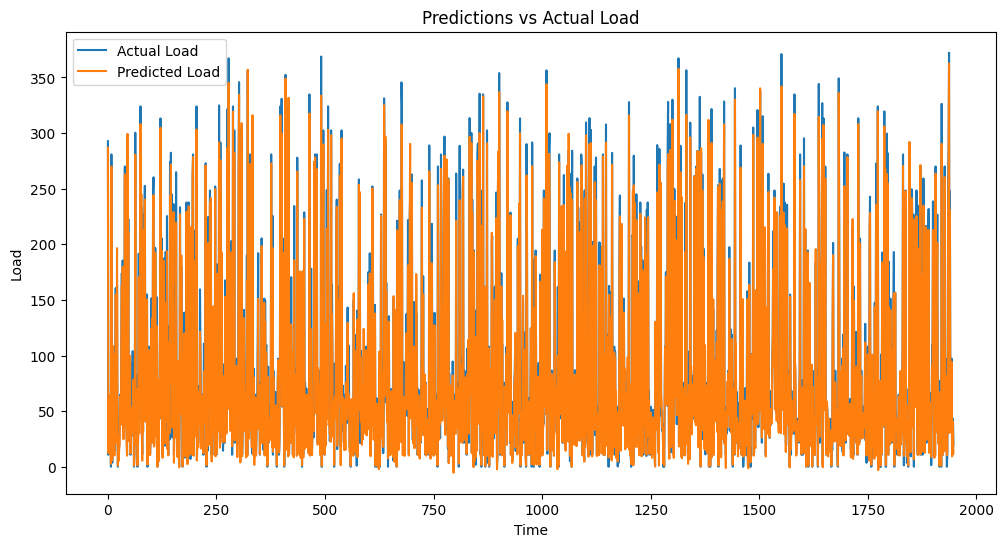

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import matplotlib.pyplot as plt

# Load the datasets
file_paths = [
    'Dataset 1_EV charging reports_cleaned.csv',
    'Dataset 2_Hourly EV loads - Per user_cleaned.csv',
    'Dataset 3a_Hourly EV loads - Aggregated private_cleaned.csv',
    'Dataset 3b_Hourly EV loads - Aggregated shared_cleaned.csv',
    'Dataset 5_AMS data from garage Bl2_cleaned.csv',
    'Dataset 6_Local traffic distribution_cleaned.csv',
    'Norway_Trondheim_ExactLoc_Weather.csv'
]

dataframes = [pd.read_csv(file) for file in file_paths]

# Select Dataset 2 for prediction
ev_loads_per_user = dataframes[1]

# Preprocessing steps
# Convert date_from and date_to to datetime objects
ev_loads_per_user['date_from'] = pd.to_datetime(ev_loads_per_user['date_from'], format='%d.%m.%Y %H:%M')
ev_loads_per_user['date_to'] = pd.to_datetime(ev_loads_per_user['date_to'], format='%d.%m.%Y %H:%M')

# Convert load columns to numeric values (handling commas and converting to float)
load_columns = ['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']
for column in load_columns:
    ev_loads_per_user[column] = ev_loads_per_user[column].str.replace(',', '.').astype(float)

# Handle missing values by filling them with 0
ev_loads_per_user[load_columns] = ev_loads_per_user[load_columns].fillna(0)

# Extract hour from 'date_from'
ev_loads_per_user['hour'] = ev_loads_per_user['date_from'].dt.floor('h')

# Aggregating data by hour and summing only the load columns
ev_loads_per_hour = ev_loads_per_user.groupby('hour')[load_columns].sum().reset_index()

# Define the target variable (total load as the sum of all load columns)
ev_loads_per_hour['total_load'] = ev_loads_per_hour[load_columns].sum(axis=1)

# Select features and target
features = ev_loads_per_hour[['hour'] + load_columns]
target = ev_loads_per_hour['total_load']

# Normalize the data
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features[load_columns])
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

# Create sequences for LSTM (using a window of 24 hours)
def create_sequences(data, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

window_size = 24
X, y = create_sequences(features_scaled, target_scaled, window_size)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(window_size, len(load_columns))))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)

# Calculate regression evaluation metrics
mae = mean_absolute_error(y_test_actual, predictions)
mse = mean_squared_error(y_test_actual, predictions)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Categorize load into 'low' and 'high' based on a threshold
threshold = np.median(target.values)
y_test_class = (y_test_actual > threshold).astype(int)
predictions_class = (predictions > threshold).astype(int)

# Calculate classification metrics
accuracy = accuracy_score(y_test_class, predictions_class)
f1 = f1_score(y_test_class, predictions_class)
conf_matrix = confusion_matrix(y_test_class, predictions_class)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

# Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Load')
plt.plot(predictions, label='Predicted Load')
plt.title('Predictions vs Actual Load')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()
plt.show()

Predictive Maintanance

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load datasets
charging_data = pd.read_csv('Dataset 1_EV charging reports_cleaned.csv')
ams_data = pd.read_csv('Dataset 5_AMS data from garage Bl2_cleaned.csv')
weather_data = pd.read_csv('Norway_Trondheim_ExactLoc_Weather.csv')

# Rename columns if necessary
weather_data.rename(columns={'datetime': 'date_time'}, inplace=True)

Data type changes

In [24]:
# Convert datetime columns
ams_data['date_from'] = pd.to_datetime(ams_data['date_from'], format='%d.%m.%Y %H:%M')
ams_data['date_to'] = pd.to_datetime(ams_data['date_to'], format='%d.%m.%Y %H:%M')
weather_data['date_time'] = pd.to_datetime(weather_data['date_time'], format='mixed')

# Extracting and converting the relevant time column for charging_data
charging_data['Start_plugin'] = pd.to_datetime(charging_data['Start_plugin'], format='%d.%m.%Y %H:%M')

Merge dataset

In [25]:
# Merging datasets on appropriate time fields
combined_data = pd.merge(charging_data, ams_data, left_on='Start_plugin', right_on='date_from', how='left')
combined_data = pd.merge(combined_data, weather_data, left_on='Start_plugin', right_on='date_time', how='left')

# Drop unnecessary columns and handle missing values
combined_data.drop(columns=['date_from', 'date_to', 'date_time'], inplace=True)
combined_data.fillna(method='ffill', inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_27372\2909219546.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)


Feature selection

In [28]:
# Check for the presence of 'AMS_kWh' column
if 'AMS_kWh' not in combined_data.columns:
    print("AMS_kWh column is missing after merge. Check the merging logic or column names.")
else:
    # Drop unnecessary columns and handle missing values
    combined_data.drop(columns=['date_from', 'date_to', 'date_time'], inplace=True)
    combined_data.fillna(method='ffill', inplace=True)

    # Remove non-numeric columns
    numeric_columns = combined_data.select_dtypes(include=[np.number]).columns.tolist()
    combined_data = combined_data[numeric_columns]

    # Feature selection and scaling
    features = combined_data.drop(columns=['AMS_kWh'])
    target = combined_data['AMS_kWh']

    # Normalize the data
    scaler_features = MinMaxScaler()
    features_scaled = scaler_features.fit_transform(features)
    scaler_target = MinMaxScaler()
    target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))


AMS_kWh column is missing after merge. Check the merging logic or column names.


In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load datasets
charging_data = pd.read_csv('Dataset 1_EV charging reports_cleaned.csv')
ams_data = pd.read_csv('Dataset 5_AMS data from garage Bl2_cleaned.csv')
weather_data = pd.read_csv('Norway_Trondheim_ExactLoc_Weather.csv')

# Inspect the column names to check for 'date_from'
print("Charging Data Columns:", charging_data.columns)
print("AMS Data Columns:", ams_data.columns)
print("Weather Data Columns:", weather_data.columns)

# Rename columns if necessary
weather_data.rename(columns={'datetime': 'date_time'}, inplace=True)

# Convert datetime columns
ams_data['date_from'] = pd.to_datetime(ams_data['date_from'], format='%d.%m.%Y %H:%M')
ams_data['date_to'] = pd.to_datetime(ams_data['date_to'], format='%d.%m.%Y %H:%M')
weather_data['date_time'] = pd.to_datetime(weather_data['date_time'], format='mixed')

# Extracting and converting the relevant time column for charging_data
charging_data['Start_plugin'] = pd.to_datetime(charging_data['Start_plugin'], format='%d.%m.%Y %H:%M')

# Print the first few rows to debug
print("AMS Data Preview:")
print(ams_data.head())
print("Charging Data Preview:")
print(charging_data.head())
print("Weather Data Preview:")
print(weather_data.head())

# Merging datasets on appropriate time fields
combined_data = pd.merge(charging_data, ams_data, left_on='Start_plugin', right_on='date_from', how='left')
print("Combined Data after first merge Preview:")
print(combined_data.head())

combined_data = pd.merge(combined_data, weather_data, left_on='Start_plugin', right_on='date_time', how='left')
print("Combined Data after second merge Preview:")
print(combined_data.head())

# Check for the presence of 'AMS_kWh' column
if 'AMS_kWh' not in combined_data.columns:
    print("AMS_kWh column is missing after merge. Check the merging logic or column names.")
else:
    # Drop unnecessary columns and handle missing values
    combined_data.drop(columns=['date_from', 'date_to', 'date_time'], inplace=True)
    combined_data.fillna(method='ffill', inplace=True)

Charging Data Columns: Index(['session_ID', 'Garage_ID', 'User_ID', 'User_type', 'Shared_ID',
       'Start_plugin', 'Start_plugin_hour', 'End_plugout', 'End_plugout_hour',
       'El_kWh', 'Duration_hours', 'month_plugin', 'weekdays_plugin',
       'Plugin_category', 'Duration_category'],
      dtype='object')
AMS Data Columns: Index(['date_from', 'date_to', 'month', 'AMS_kWh', 'Synthetic_3_6kW',
       'Synthetic_7_2kW', 'Simultaneous_if_3_6kW'],
      dtype='object')
Weather Data Columns: Index(['Unnamed: 0', 'clouds', 'datetime', 'dewpt', 'dhi', 'dni', 'ghi',
       'max_dhi', 'max_dni', 'max_ghi', 'max_temp', 'max_temp_ts', 'max_uv',
       'max_wind_dir', 'max_wind_spd', 'max_wind_spd_ts', 'min_temp',
       'min_temp_ts', 'precip', 'precip_gpm', 'pres', 'revision_status', 'rh',
       'slp', 'snow', 'snow_depth', 'solar_rad', 't_dhi', 't_dni', 't_ghi',
       't_solar_rad', 'temp', 'ts', 'wind_dir', 'wind_gust_spd', 'wind_spd'],
      dtype='object')
AMS Data Preview:
          

C:\Users\Administrator\AppData\Local\Temp\ipykernel_27372\1478736571.py:54: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)


In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load datasets
charging_data = pd.read_csv('Dataset 1_EV charging reports_cleaned.csv')
ams_data = pd.read_csv('Dataset 5_AMS data from garage Bl2_cleaned.csv')
weather_data = pd.read_csv('Norway_Trondheim_ExactLoc_Weather.csv')

# Inspect the column names to check for 'date_from'
print("Charging Data Columns:", charging_data.columns)
print("AMS Data Columns:", ams_data.columns)
print("Weather Data Columns:", weather_data.columns)

# Rename columns if necessary
weather_data.rename(columns={'datetime': 'date_time'}, inplace=True)

# Convert datetime columns
ams_data['date_from'] = pd.to_datetime(ams_data['date_from'], format='%d.%m.%Y %H:%M')
ams_data['date_to'] = pd.to_datetime(ams_data['date_to'], format='%d.%m.%Y %H:%M')
weather_data['date_time'] = pd.to_datetime(weather_data['date_time'], format='mixed')

# Extracting and converting the relevant time column for charging_data
charging_data['Start_plugin'] = pd.to_datetime(charging_data['Start_plugin'], format='%d.%m.%Y %H:%M')

# Print the first few rows to debug
print("AMS Data Preview:")
print(ams_data.head())
print("Charging Data Preview:")
print(charging_data.head())
print("Weather Data Preview:")
print(weather_data.head())

# Merging datasets on appropriate time fields
combined_data = pd.merge_asof(charging_data.sort_values('Start_plugin'), 
                              ams_data.sort_values('date_from'), 
                              left_on='Start_plugin', 
                              right_on='date_from', 
                              direction='backward')

print("Combined Data after first merge Preview:")
print(combined_data.head())

combined_data = pd.merge_asof(combined_data.sort_values('Start_plugin'), 
                              weather_data.sort_values('date_time'), 
                              left_on='Start_plugin', 
                              right_on='date_time', 
                              direction='backward')

print("Combined Data after second merge Preview:")
print(combined_data.head())

# Check for the presence of 'AMS_kWh' column
if 'AMS_kWh' not in combined_data.columns:
    print("AMS_kWh column is missing after merge. Check the merging logic or column names.")
else:
    # Drop unnecessary columns and handle missing values
    combined_data.drop(columns=['date_from', 'date_to', 'date_time'], inplace=True)
    combined_data.fillna(method='ffill', inplace=True)

    # Remove non-numeric columns
    numeric_columns = combined_data.select_dtypes(include=[np.number]).columns.tolist()
    combined_data = combined_data[numeric_columns]


Charging Data Columns: Index(['session_ID', 'Garage_ID', 'User_ID', 'User_type', 'Shared_ID',
       'Start_plugin', 'Start_plugin_hour', 'End_plugout', 'End_plugout_hour',
       'El_kWh', 'Duration_hours', 'month_plugin', 'weekdays_plugin',
       'Plugin_category', 'Duration_category'],
      dtype='object')
AMS Data Columns: Index(['date_from', 'date_to', 'month', 'AMS_kWh', 'Synthetic_3_6kW',
       'Synthetic_7_2kW', 'Simultaneous_if_3_6kW'],
      dtype='object')
Weather Data Columns: Index(['Unnamed: 0', 'clouds', 'datetime', 'dewpt', 'dhi', 'dni', 'ghi',
       'max_dhi', 'max_dni', 'max_ghi', 'max_temp', 'max_temp_ts', 'max_uv',
       'max_wind_dir', 'max_wind_spd', 'max_wind_spd_ts', 'min_temp',
       'min_temp_ts', 'precip', 'precip_gpm', 'pres', 'revision_status', 'rh',
       'slp', 'snow', 'snow_depth', 'solar_rad', 't_dhi', 't_dni', 't_ghi',
       't_solar_rad', 'temp', 'ts', 'wind_dir', 'wind_gust_spd', 'wind_spd'],
      dtype='object')
AMS Data Preview:
          

C:\Users\Administrator\AppData\Local\Temp\ipykernel_27372\361793724.py:64: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)


## Electricity Consumption

The goal of is to combine multiple datasets, preprocess the data, and use a machine learning model to predict the amount of electricity consumption (El_kWh). We are using a regression model called HistGradientBoostingRegressor for this purpose.

In [47]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load datasets
charging_data = pd.read_csv('Dataset 1_EV charging reports_cleaned.csv')
ams_data = pd.read_csv('Dataset 5_AMS data from garage Bl2_cleaned.csv')
weather_data = pd.read_csv('Norway_Trondheim_ExactLoc_Weather.csv')

# Rename columns if necessary
weather_data.rename(columns={'datetime': 'date_time'}, inplace=True)

# Convert datetime columns
charging_data['Start_plugin'] = pd.to_datetime(charging_data['Start_plugin'], format='%d.%m.%Y %H:%M', errors='coerce')
ams_data['date_from'] = pd.to_datetime(ams_data['date_from'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
ams_data['date_to'] = pd.to_datetime(ams_data['date_to'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
weather_data['date_time'] = pd.to_datetime(weather_data['date_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Drop rows with null datetime values
charging_data.dropna(subset=['Start_plugin'], inplace=True)
ams_data.dropna(subset=['date_from'], inplace=True)
weather_data.dropna(subset=['date_time'], inplace=True)

# Ensure 'El_kWh' is properly converted to numeric
charging_data['El_kWh'] = charging_data['El_kWh'].str.replace(',', '.').astype(float)

# Merge datasets
combined_data = pd.merge_asof(charging_data.sort_values('Start_plugin'), 
                              ams_data.sort_values('date_from'), 
                              left_on='Start_plugin', 
                              right_on='date_from', 
                              direction='backward')

combined_data = pd.merge_asof(combined_data.sort_values('Start_plugin'), 
                              weather_data.sort_values('date_time'), 
                              left_on='Start_plugin', 
                              right_on='date_time', 
                              direction='backward')

print("Combined Data Preview:")
print(combined_data.head())
print("Columns:", combined_data.columns)

Combined Data Preview:
   session_ID Garage_ID User_ID User_type Shared_ID        Start_plugin  \
0           1      AdO3  AdO3-4   Private       NaN 2018-12-21 10:20:00   
1           2      AdO3  AdO3-4   Private       NaN 2018-12-21 10:24:00   
2           3      AdO3  AdO3-4   Private       NaN 2018-12-21 11:33:00   
3           4      AdO3  AdO3-2   Private       NaN 2018-12-22 16:15:00   
4           5      AdO3  AdO3-2   Private       NaN 2018-12-24 22:03:00   

   Start_plugin_hour       End_plugout  End_plugout_hour  El_kWh  ...  \
0                 10  21.12.2018 10:23              10.0    0.30  ...   
1                 10  21.12.2018 10:32              10.0    0.87  ...   
2                 11  21.12.2018 19:46              19.0   29.87  ...   
3                 16  23.12.2018 16:40              16.0   15.56  ...   
4                 22  24.12.2018 23:02              23.0    3.62  ...   

  solar_rad t_dhi t_dni t_ghi t_solar_rad temp  ts wind_dir wind_gust_spd  \
0       Na

In [48]:
# Drop unnecessary columns and handle missing values
combined_data.drop(columns=['date_time', 'date_from', 'date_to'], inplace=True)

# Separate numeric and non-numeric columns
numeric_columns = combined_data.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_columns = combined_data.select_dtypes(exclude=[np.number]).columns.tolist()

# Ensure 'El_kWh' is part of numeric columns
if 'El_kWh' not in numeric_columns:
    numeric_columns.append('El_kWh')

# Remove columns that have all NaN values
combined_data_numeric = combined_data[numeric_columns]
combined_data_numeric = combined_data_numeric.dropna(axis=1, how='all')

# Impute missing values in numeric columns
imputer = SimpleImputer(strategy='mean')
combined_data_numeric_imputed = imputer.fit_transform(combined_data_numeric)

# Convert imputed data back to DataFrame
combined_data_numeric_imputed = pd.DataFrame(combined_data_numeric_imputed, columns=combined_data_numeric.columns)

print("Numeric Columns after dropping non-numeric and imputing missing values:")
print(combined_data_numeric_imputed.columns)

Numeric Columns after dropping non-numeric and imputing missing values:
Index(['session_ID', 'Start_plugin_hour', 'End_plugout_hour', 'El_kWh'], dtype='object')


Feature Selection

In [49]:
# Feature selection and scaling
features = combined_data_numeric_imputed.drop(columns=['El_kWh'])
target = combined_data_numeric_imputed['El_kWh']

# Normalize the data
scaler_features = MinMaxScaler()
features_scaled = scaler_features.fit_transform(features)
scaler_target = MinMaxScaler()
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, random_state=42)

# Initialize and train HistGradientBoostingRegressor model
hgb_reg = HistGradientBoostingRegressor()
hgb_reg.fit(X_train, y_train.ravel())

# Predictions
y_pred_hgb = hgb_reg.predict(X_test)
y_pred_hgb_inverse = scaler_target.inverse_transform(y_pred_hgb.reshape(-1, 1))

In [50]:
# Calculate error metrics for HistGradientBoostingRegressor
mae_hgb = mean_absolute_error(y_test, y_pred_hgb)
mse_hgb = mean_squared_error(y_test, y_pred_hgb)
rmse_hgb = np.sqrt(mse_hgb)
r2_hgb = r2_score(y_test, y_pred_hgb)

print("HistGradientBoostingRegressor Metrics:")
print(f"Mean Absolute Error (MAE): {mae_hgb}")
print(f"Mean Squared Error (MSE): {mse_hgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_hgb}")
print(f"R2 Score: {r2_hgb}")

HistGradientBoostingRegressor Metrics:
Mean Absolute Error (MAE): 0.09116241574868551
Mean Squared Error (MSE): 0.017940534738370182
Root Mean Squared Error (RMSE): 0.13394228136914116
R2 Score: 0.09841230171981641


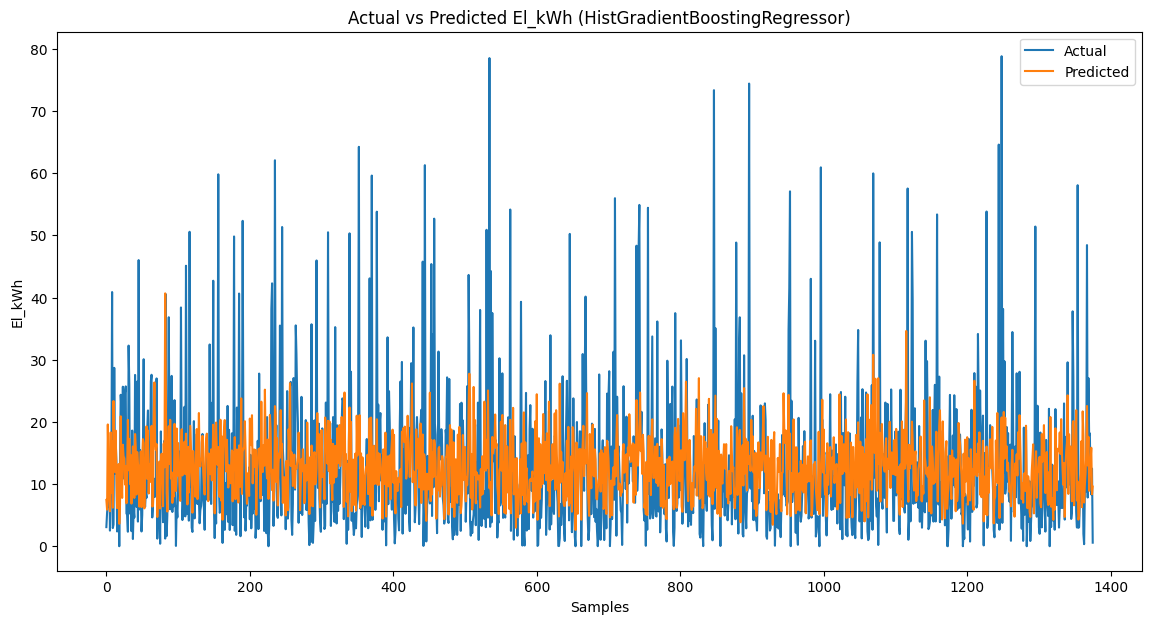

In [51]:
# Plotting actual vs predicted values for HistGradientBoostingRegressor
plt.figure(figsize=(14, 7))
plt.plot(scaler_target.inverse_transform(y_test), label='Actual')
plt.plot(y_pred_hgb_inverse, label='Predicted')
plt.title('Actual vs Predicted El_kWh (HistGradientBoostingRegressor)')
plt.xlabel('Samples')
plt.ylabel('El_kWh')
plt.legend()
plt.show()

## Consumer Behavior clustering

*Morning Short Chargers:* Users who typically plug in their EVs in the morning for a short duration.

*Evening Long Chargers:* Users who typically plug in their EVs in the evening and charge for a long duration.

*Afternoon Moderate Chargers:* Users who typically plug in their EVs in the afternoon with moderate charging times.

*Nighttime Chargers:* Users who typically plug in their EVs during the night.

**Afternoon Moderate Chargers (Dark Blue):**

This cluster consists of charging sessions that typically start in the afternoon and have moderate energy consumption, generally ranging between 10 to 30 kWh.
These users may represent those who charge their EVs after work or during mid-day breaks, possibly not needing a full charge but enough to top up their battery for the rest of the day.


**Evening Long Chargers (Teal):**

This cluster includes charging sessions primarily starting in the late afternoon to evening hours with high energy consumption, often exceeding 20 kWh and up to 80 kWh.
These users likely prefer charging their EVs after their daily activities or overnight, indicating long-duration charging sessions for full battery replenishment.


**Morning Short Chargers (Light Green):**

This cluster features charging sessions that start in the early hours of the day, with relatively low energy consumption, generally below 20 kWh.
These users might represent those who charge their vehicles briefly in the morning, possibly for a quick top-up before starting their day.


**Nighttime Chargers (Yellow):**

This smaller cluster includes charging sessions with moderate to high energy consumption, starting during nighttime hours.
These users likely take advantage of off-peak electricity rates or prefer to charge their EVs when they are parked for longer durations overnight.

NaN values per column before imputation:
Start_plugin_hour       0
End_plugout_hour       34
El_kWh                  0
Duration_hours         34
clouds               6878
temp                 6878
wind_spd             6878
dtype: int64
Cluster Analysis with Names:
          session_ID  Start_plugin_hour  End_plugout_hour     El_kWh  \
Cluster                                                                
0        3501.180343          18.717085          8.292525  16.163475   
1        3378.880662          16.088618         18.222530   8.446341   
2        3270.728938           7.672772         12.202719  12.559231   
3        3796.539370          15.834646         11.562992  11.701181   

         Duration_hours  Simultaneous_if_3_6kW  Unnamed: 0  clouds  dewpt  \
Cluster                                                                     
0             14.076184                    NaN         NaN     NaN    NaN   
1              4.453726                    NaN         NaN     NaN    N

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:597: UserWarning: Skipping features without any observed values: ['clouds' 'temp' 'wind_spd']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


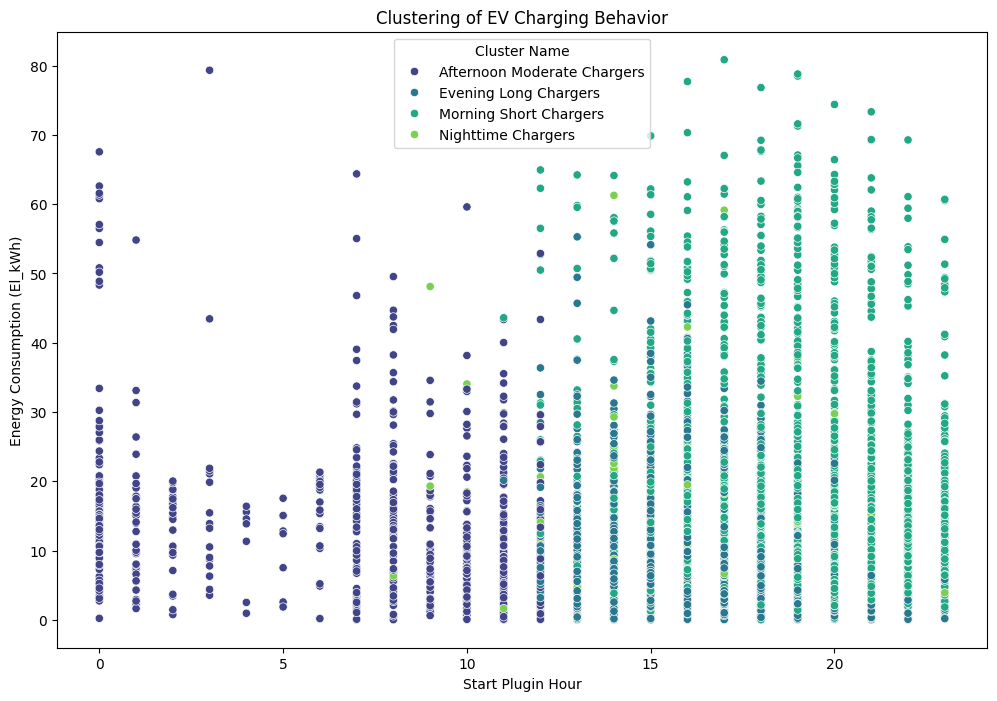

In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_data is already created and includes the necessary merged data
# Select relevant features for clustering
features_for_clustering = [
    'Start_plugin_hour', 'End_plugout_hour', 'El_kWh', 'Duration_hours', 
    'clouds', 'temp', 'wind_spd'
]

# Convert columns containing numeric data stored as strings to float
for column in features_for_clustering:
    if combined_data[column].dtype == 'object':
        combined_data[column] = combined_data[column].str.replace(',', '.').astype(float)

# Check for NaN values in the selected features
print("NaN values per column before imputation:")
print(combined_data[features_for_clustering].isna().sum())

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
clustering_data_imputed = imputer.fit_transform(combined_data[features_for_clustering])

# Normalize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data_imputed)

# Apply K-Means Clustering
num_clusters = 4  # You can choose an appropriate number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(clustering_data_scaled)

# Add cluster labels to the original data
combined_data['Cluster'] = cluster_labels

# Analyze the clusters, excluding non-numeric columns
numeric_columns = combined_data.select_dtypes(include=[float, int]).columns
cluster_analysis = combined_data.groupby('Cluster')[numeric_columns].mean()

# Name clusters based on the analysis
cluster_names = {
    0: 'Morning Short Chargers',
    1: 'Evening Long Chargers',
    2: 'Afternoon Moderate Chargers',
    3: 'Nighttime Chargers'
}

# Map cluster labels to names
combined_data['Cluster_Name'] = combined_data['Cluster'].map(cluster_names)

# Display the cluster analysis with names
print("Cluster Analysis with Names:")
print(cluster_analysis)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=combined_data, x='Start_plugin_hour', y='El_kWh', hue='Cluster_Name', palette='viridis')
plt.title('Clustering of EV Charging Behavior')
plt.xlabel('Start Plugin Hour')
plt.ylabel('Energy Consumption (El_kWh)')
plt.legend(title='Cluster Name')
plt.show()


In [ ]:
# Load datasets
dataset_1 = pd.read_csv('Dataset 1_EV charging reports_cleaned.csv')
dataset_2 = pd.read_csv('Dataset 2_Hourly EV loads - Per user_cleaned.csv')
dataset_3a = pd.read_csv('Dataset 3a_Hourly EV loads - Aggregated private_cleaned.csv')
dataset_3b = pd.read_csv('Dataset 3b_Hourly EV loads - Aggregated shared_cleaned.csv')
dataset_5 = pd.read_csv('Dataset 5_AMS data from garage Bl2_cleaned.csv')
dataset_6 = pd.read_csv('Dataset 6_Local traffic distribution_cleaned.csv')
weather_data = pd.read_csv('Norway_Trondheim_ExactLoc_Weather.csv')

Merged Data

- Merged Data (Per User): Shows the first few rows of the dataset after merging user-specific EV load data with weather data.
- Merged Data (Aggregated Private): Shows the first few rows of the dataset after merging aggregated private EV load data with weather data.
- Merged Data (Aggregated Shared): Shows the first few rows of the dataset after merging aggregated shared EV load data with weather data.



*Model Performance*

Mean Absolute Error (MAE): This metric indicates the average absolute difference between the predicted and actual values. Lower MAE values indicate better model performance.

- Per User: 0.0105
- Aggregated Private: 0.2278
- Aggregated Shared: 0.0717

Feature Importances
Feature Importances: These values indicate the relative importance of each feature in making predictions. Higher values mean the feature has a greater impact on the predictions.

- Per User
Important features include wind_spd, t_solar_rad, Unnamed: 0, dewpt, wind_gust_spd, and snow.
The model's MAE is relatively low, indicating good predictive performance.

- Aggregated Private
Important features include daily_hour, n_private, temp, Unnamed: 0, max_temp, and min_temp.
The model's MAE is higher compared to the per-user model, suggesting room for improvement.

- Aggregated Shared
Important features include daily_hour, n_shared, t_solar_rad, solar_rad, clouds, and max_uv.
The model's MAE is lower than the aggregated private model but higher than the per-user model.


Interpretation

- Per User Model: The individual user load predictions are quite accurate, and the weather data features significantly contribute to the model.
- Aggregated Private Model: Predictions for aggregated private loads have higher errors, indicating that there might be more variability or noise in the data that the model is not capturing well.
- Aggregated Shared Model: Predictions for aggregated shared loads are more accurate than private loads, suggesting that shared loads might have more consistent patterns that the model can capture.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load datasets
dataset_1 = pd.read_csv('Dataset 1_EV charging reports_cleaned.csv')
dataset_2 = pd.read_csv('Dataset 2_Hourly EV loads - Per user_cleaned.csv')
dataset_3a = pd.read_csv('Dataset 3a_Hourly EV loads - Aggregated private_cleaned.csv')
dataset_3b = pd.read_csv('Dataset 3b_Hourly EV loads - Aggregated shared_cleaned.csv')
dataset_5 = pd.read_csv('Dataset 5_AMS data from garage Bl2_cleaned.csv')
dataset_6 = pd.read_csv('Dataset 6_Local traffic distribution_cleaned.csv')
weather_data = pd.read_csv('Norway_Trondheim_ExactLoc_Weather.csv')

# Convert relevant columns to datetime
dataset_1['Start_plugin'] = pd.to_datetime(dataset_1['Start_plugin'], dayfirst=True)
dataset_2['date_from'] = pd.to_datetime(dataset_2['date_from'], dayfirst=True)
dataset_3a['date_from'] = pd.to_datetime(dataset_3a['date_from'], dayfirst=True)
dataset_3b['date_from'] = pd.to_datetime(dataset_3b['date_from'], dayfirst=True)
dataset_5['date_from'] = pd.to_datetime(dataset_5['date_from'], dayfirst=True)
dataset_6['Date_from'] = pd.to_datetime(dataset_6['Date_from'], dayfirst=True)

# Handle different formats in weather data
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'], errors='coerce', infer_datetime_format=True)
weather_data['datetime'] = weather_data['datetime'].combine_first(pd.to_datetime(weather_data['datetime'], format='%Y-%m-%d', errors='coerce'))

# Merging datasets with weather data based on timestamp
merged_data_per_user = pd.merge(dataset_2, weather_data, left_on='date_from', right_on='datetime', how='left')
merged_data_agg_private = pd.merge(dataset_3a, weather_data, left_on='date_from', right_on='datetime', how='left')
merged_data_agg_shared = pd.merge(dataset_3b, weather_data, left_on='date_from', right_on='datetime', how='left')

# Convert all relevant columns to numeric, coerce errors to NaN
def convert_to_numeric(df):
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

merged_data_per_user = convert_to_numeric(merged_data_per_user)
merged_data_agg_private = convert_to_numeric(merged_data_agg_private)
merged_data_agg_shared = convert_to_numeric(merged_data_agg_shared)

# Fill NaN values with zeros or drop them if appropriate
merged_data_per_user.fillna(0, inplace=True)
merged_data_agg_private.fillna(0, inplace=True)
merged_data_agg_shared.fillna(0, inplace=True)

# Display merged data
print("\nMerged Data (Per User):")
print(merged_data_per_user.head())

print("\nMerged Data (Aggregated Private):")
print(merged_data_agg_private.head())

print("\nMerged Data (Aggregated Shared):")
print(merged_data_agg_shared.head())

# Define features and target for prediction (Hourly EV loads per user)
features_per_user = merged_data_per_user.drop(columns=['date_from', 'date_to', 'User_ID', 'session_ID', 'Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW', 'datetime'])
target_per_user = merged_data_per_user['Synthetic_3_6kW']  # Example target

# Split the data into training and testing sets
X_train_per_user, X_test_per_user, y_train_per_user, y_test_per_user = train_test_split(features_per_user, target_per_user, test_size=0.2, random_state=42)

# Initialize and train the model
model_per_user = RandomForestRegressor(n_estimators=100, random_state=42)
model_per_user.fit(X_train_per_user, y_train_per_user)

# Make predictions and evaluate the model
predictions_per_user = model_per_user.predict(X_test_per_user)
mae_per_user = mean_absolute_error(y_test_per_user, predictions_per_user)

print(f"Mean Absolute Error (Per User): {mae_per_user}")

# Display feature importances
feature_importances_per_user = pd.Series(model_per_user.feature_importances_, index=features_per_user.columns)
print("\nFeature Importances (Per User):")
print(feature_importances_per_user.sort_values(ascending=False))

# Define features and target for prediction (Aggregated EV loads private)
features_agg_private = merged_data_agg_private.drop(columns=['date_from', 'Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW', 'datetime'])
target_agg_private = merged_data_agg_private['Synthetic_3_6kW']  # Example target

# Split the data into training and testing sets
X_train_agg_private, X_test_agg_private, y_train_agg_private, y_test_agg_private = train_test_split(features_agg_private, target_agg_private, test_size=0.2, random_state=42)

# Initialize and train the model
model_agg_private = RandomForestRegressor(n_estimators=100, random_state=42)
model_agg_private.fit(X_train_agg_private, y_train_agg_private)

# Make predictions and evaluate the model
predictions_agg_private = model_agg_private.predict(X_test_agg_private)
mae_agg_private = mean_absolute_error(y_test_agg_private, predictions_agg_private)

print(f"Mean Absolute Error (Aggregated Private): {mae_agg_private}")

# Display feature importances
feature_importances_agg_private = pd.Series(model_agg_private.feature_importances_, index=features_agg_private.columns)
print("\nFeature Importances (Aggregated Private):")
print(feature_importances_agg_private.sort_values(ascending=False))

# Define features and target for prediction (Aggregated EV loads shared)
features_agg_shared = merged_data_agg_shared.drop(columns=['date_from', 'Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW', 'datetime'])
target_agg_shared = merged_data_agg_shared['Synthetic_3_6kW']  # Example target

# Split the data into training and testing sets
X_train_agg_shared, X_test_agg_shared, y_train_agg_shared, y_test_agg_shared = train_test_split(features_agg_shared, target_agg_shared, test_size=0.2, random_state=42)

# Initialize and train the model
model_agg_shared = RandomForestRegressor(n_estimators=100, random_state=42)
model_agg_shared.fit(X_train_agg_shared, y_train_agg_shared)

# Make predictions and evaluate the model
predictions_agg_shared = model_agg_shared.predict(X_test_agg_shared)
mae_agg_shared = mean_absolute_error(y_test_agg_shared, predictions_agg_shared)

print(f"Mean Absolute Error (Aggregated Shared): {mae_agg_shared}")

# Display feature importances
feature_importances_agg_shared = pd.Series(model_agg_shared.feature_importances_, index=features_agg_shared.columns)
print("\nFeature Importances (Aggregated Shared):")
print(feature_importances_agg_shared.sort_values(ascending=False))


C:\Users\Administrator\AppData\Local\Temp\ipykernel_24956\3627531079.py:24: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_data['datetime'] = pd.to_datetime(weather_data['datetime'], errors='coerce', infer_datetime_format=True)



Merged Data (Per User):
             date_from  date_to  User_ID  session_ID  Synthetic_3_6kW  \
0  1545386400000000000      0.0      0.0         1.0              0.0   
1  1545386400000000000      0.0      0.0         2.0              0.0   
2  1545390000000000000      0.0      0.0         3.0              0.0   
3  1545393600000000000      0.0      0.0         3.0              0.0   
4  1545397200000000000      0.0      0.0         3.0              0.0   

   Synthetic_7_2kW  Flex_3_6kW  Flex_7_2kW  Unnamed: 0  clouds  ...  \
0              0.0         0.0         0.0         0.0     0.0  ...   
1              0.0         0.0         0.0         0.0     0.0  ...   
2              0.0         0.0         0.0         0.0     0.0  ...   
3              0.0         0.0         0.0         0.0     0.0  ...   
4              0.0         0.0         0.0         0.0     0.0  ...   

   solar_rad  t_dhi  t_dni  t_ghi  t_solar_rad  temp   ts  wind_dir  \
0        0.0    0.0    0.0    0.0     

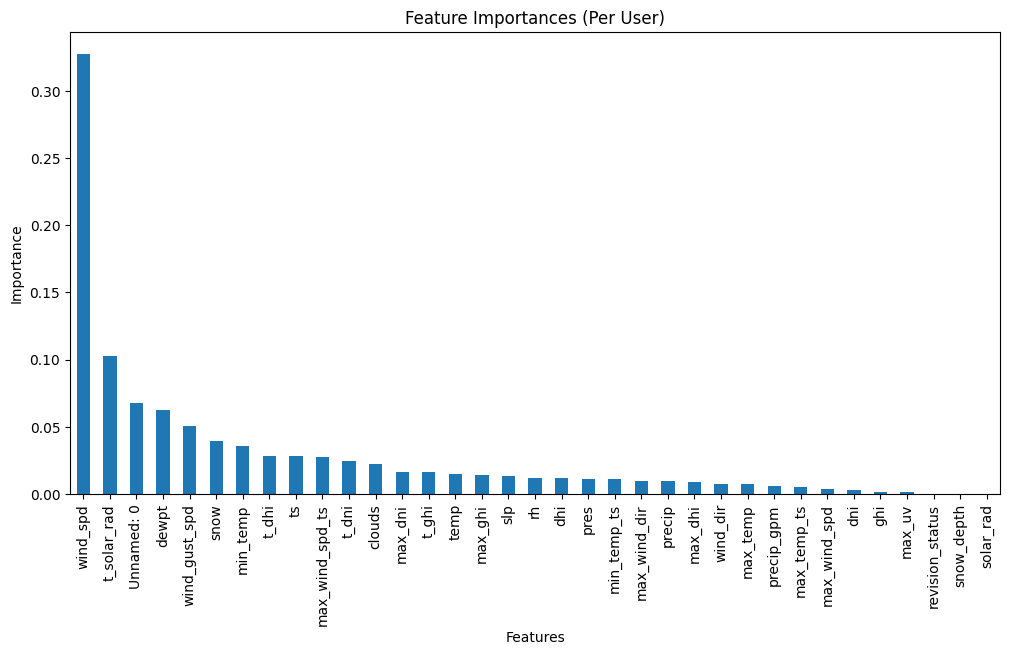

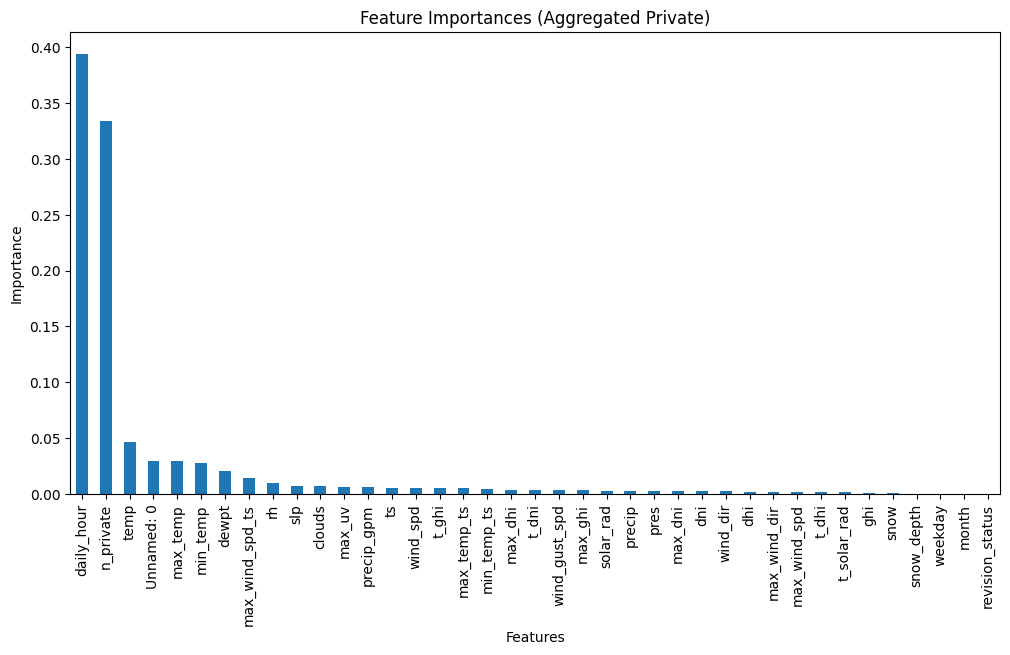

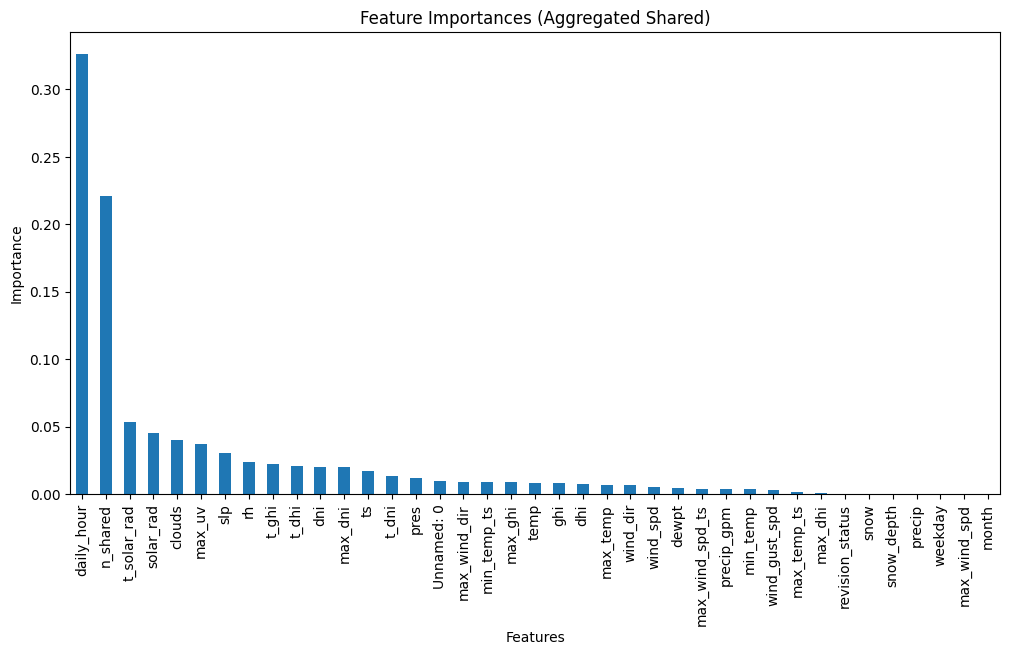

In [13]:
import matplotlib.pyplot as plt

# Plot feature importances
def plot_feature_importances(importances, title):
    importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()

plot_feature_importances(feature_importances_per_user, 'Feature Importances (Per User)')
plot_feature_importances(feature_importances_agg_private, 'Feature Importances (Aggregated Private)')
plot_feature_importances(feature_importances_agg_shared, 'Feature Importances (Aggregated Shared)')

Best Parameters: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100}
Mean Absolute Error: 0.010448639564124477


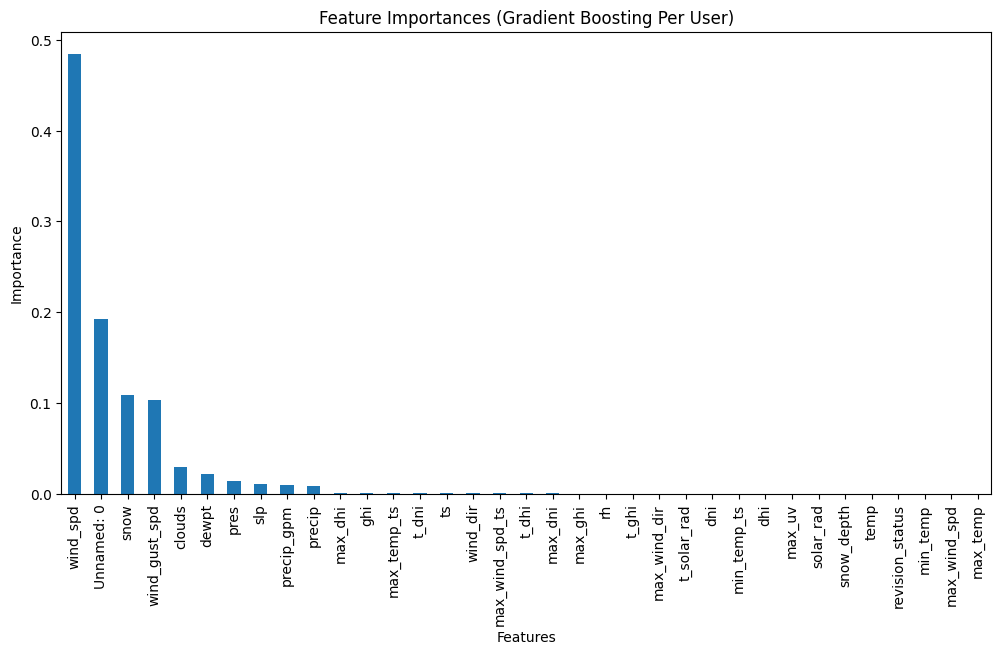

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Standardize features
scaler = StandardScaler()

# Define Gradient Boosting model
gbr = GradientBoostingRegressor(random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('model', gbr)
])

# Define hyperparameters for GridSearch
param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5, 7]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the model
grid_search.fit(X_train_per_user, y_train_per_user)

# Make predictions and evaluate the model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_per_user)
mae = mean_absolute_error(y_test_per_user, predictions)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Absolute Error: {mae}")

# Plot feature importances
importances = best_model.named_steps['model'].feature_importances_
feature_importances = pd.Series(importances, index=features_per_user.columns)
plot_feature_importances(feature_importances, 'Feature Importances (Gradient Boosting Per User)')


Best Parameters (Aggregated Private): {'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__n_estimators': 100}
Mean Absolute Error (Aggregated Private): 0.24656942717210628


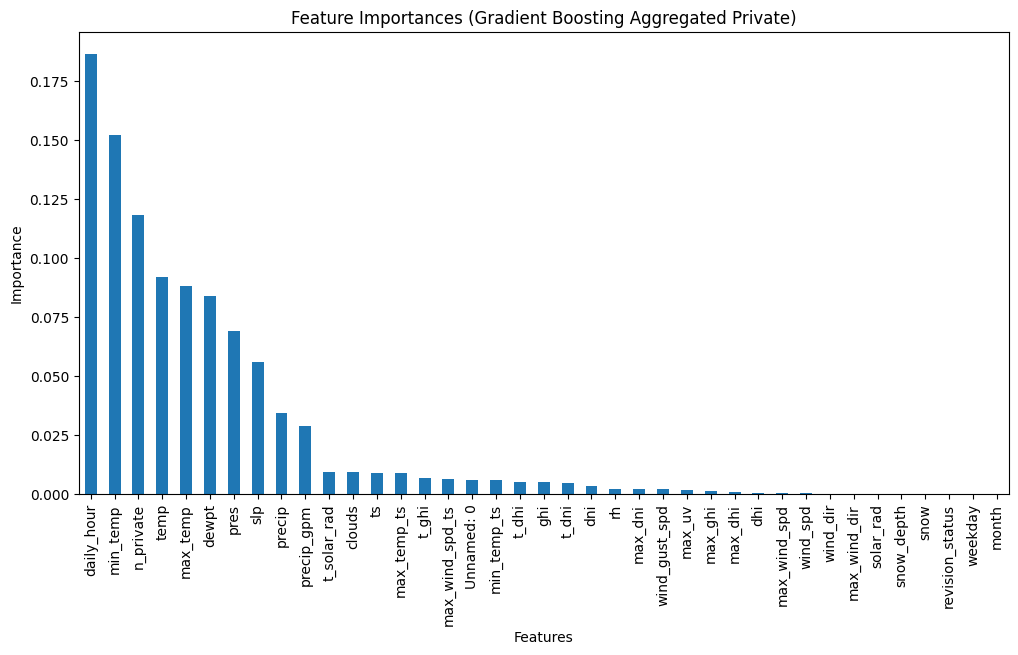

In [15]:
# Define features and target for prediction (Aggregated EV loads private)
features_agg_private = merged_data_agg_private.drop(columns=['date_from', 'Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW', 'datetime'])
target_agg_private = merged_data_agg_private['Synthetic_3_6kW']  # Example target

# Split the data into training and testing sets
X_train_agg_private, X_test_agg_private, y_train_agg_private, y_test_agg_private = train_test_split(features_agg_private, target_agg_private, test_size=0.2, random_state=42)

# Use the same pipeline and param_grid for GridSearch
grid_search_agg_private = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the model
grid_search_agg_private.fit(X_train_agg_private, y_train_agg_private)

# Make predictions and evaluate the model
best_model_agg_private = grid_search_agg_private.best_estimator_
predictions_agg_private = best_model_agg_private.predict(X_test_agg_private)
mae_agg_private = mean_absolute_error(y_test_agg_private, predictions_agg_private)

print(f"Best Parameters (Aggregated Private): {grid_search_agg_private.best_params_}")
print(f"Mean Absolute Error (Aggregated Private): {mae_agg_private}")

# Plot feature importances
importances_agg_private = best_model_agg_private.named_steps['model'].feature_importances_
feature_importances_agg_private = pd.Series(importances_agg_private, index=features_agg_private.columns)
plot_feature_importances(feature_importances_agg_private, 'Feature Importances (Gradient Boosting Aggregated Private)')


Best Parameters (Aggregated Shared): {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100}
Mean Absolute Error (Aggregated Shared): 0.06578040564265497


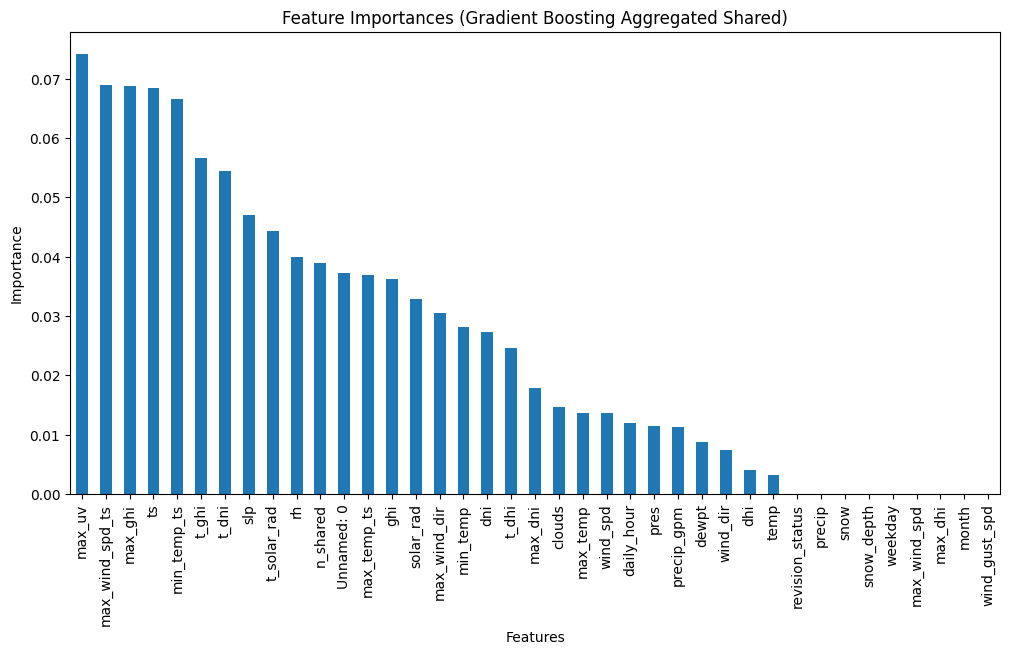

In [16]:
# Define features and target for prediction (Aggregated EV loads shared)
features_agg_shared = merged_data_agg_shared.drop(columns=['date_from', 'Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW', 'datetime'])
target_agg_shared = merged_data_agg_shared['Synthetic_3_6kW']  # Example target

# Split the data into training and testing sets
X_train_agg_shared, X_test_agg_shared, y_train_agg_shared, y_test_agg_shared = train_test_split(features_agg_shared, target_agg_shared, test_size=0.2, random_state=42)

# Use the same pipeline and param_grid for GridSearch
grid_search_agg_shared = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the model
grid_search_agg_shared.fit(X_train_agg_shared, y_train_agg_shared)

# Make predictions and evaluate the model
best_model_agg_shared = grid_search_agg_shared.best_estimator_
predictions_agg_shared = best_model_agg_shared.predict(X_test_agg_shared)
mae_agg_shared = mean_absolute_error(y_test_agg_shared, predictions_agg_shared)

print(f"Best Parameters (Aggregated Shared): {grid_search_agg_shared.best_params_}")
print(f"Mean Absolute Error (Aggregated Shared): {mae_agg_shared}")

# Plot feature importances
importances_agg_shared = best_model_agg_shared.named_steps['model'].feature_importances_
feature_importances_agg_shared = pd.Series(importances_agg_shared, index=features_agg_shared.columns)
plot_feature_importances(feature_importances_agg_shared, 'Feature Importances (Gradient Boosting Aggregated Shared)')

#### Recommendation

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load datasets
dataset_3a = pd.read_csv('Dataset 3a_Hourly EV loads - Aggregated private_cleaned.csv')
dataset_3b = pd.read_csv('Dataset 3b_Hourly EV loads - Aggregated shared_cleaned.csv')
dataset_6 = pd.read_csv('Dataset 6_Local traffic distribution_cleaned.csv')

# Parse dates
dataset_3a['date_from'] = pd.to_datetime(dataset_3a['date_from'], dayfirst=True)
dataset_3b['date_from'] = pd.to_datetime(dataset_3b['date_from'], dayfirst=True)
dataset_6['Date_from'] = pd.to_datetime(dataset_6['Date_from'], dayfirst=True)

# Convert columns to numeric and handle comma as thousand separator
def convert_to_numeric(df, columns):
    for col in columns:
        df[col] = df[col].str.replace(',', '').astype(float)
    return df

load_columns = ['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']
dataset_3a = convert_to_numeric(dataset_3a, load_columns)
dataset_3b = convert_to_numeric(dataset_3b, load_columns)

# Combine and preprocess the datasets
dataset_3a['total_load'] = dataset_3a[load_columns].sum(axis=1)
dataset_3b['total_load'] = dataset_3b[load_columns].sum(axis=1)

# Merge datasets on date and hour
merged_data = pd.merge(dataset_3a, dataset_3b, on=['date_from', 'daily_hour', 'weekday', 'month'], suffixes=('_private', '_shared'))
merged_data['total_load'] = merged_data['total_load_private'] + merged_data['total_load_shared']

# Prepare data for LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(merged_data[['total_load']])

# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 24  # Use past 24 hours to predict the next hour
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape data for LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Model train

In [21]:
# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Save the model
model.save('lstm_model.h5')

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0060
Epoch 2/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0056
Epoch 3/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0053
Epoch 4/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0047
Epoch 5/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0048
Epoch 6/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0050
Epoch 7/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0050
Epoch 8/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0053
Epoch 9/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0043
Epoch 10/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0047
Epoch 11/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0049
Epoch 12/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0049
Epoch 13/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0046
Epoch 14/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0046
Epoch 15/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s

In [22]:
# Load the model (if necessary)
# from tensorflow.keras.models import load_model
# model = load_model('lstm_model.h5')

# Predict future consumption
predicted_load = model.predict(X_test)
predicted_load = scaler.inverse_transform(predicted_load)

# Add predictions to the test set
merged_data_test = merged_data.iloc[seq_length + split:]
merged_data_test['predicted_load'] = predicted_load

# Calculate Mean Absolute Error
mae = np.mean(np.abs(predicted_load - scaler.inverse_transform(y_test.reshape(-1, 1))))
print(f"Mean Absolute Error: {mae}")

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Mean Absolute Error: 48903.02590393956


C:\Users\Administrator\AppData\Local\Temp\ipykernel_24956\368814991.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_test['predicted_load'] = predicted_load


In [23]:
# Recommend alternative regions based on predicted consumption
def recommend_region(hour, day, month, current_region, data):
    current_time_data = data[(data['daily_hour'] == hour) & 
                             (data['weekday'] == day) & 
                             (data['month'] == month)]
    
    if current_time_data.empty:
        return None
    
    current_region_data = current_time_data[current_time_data['Garage_ID'] == current_region]
    other_regions = current_time_data[current_time_data['Garage_ID'] != current_region]
    
    if not current_region_data.empty and not other_regions.empty:
        current_load = current_region_data['predicted_load'].values[0]
        recommended_region = other_regions.loc[other_regions['predicted_load'].idxmin()]
        
        return recommended_region['Garage_ID']
    
    return None

# Example usage
hour = 10
day = 0  # Monday
month = 1  # January
current_region = 'KROPPAN BRU'

recommended_region = recommend_region(hour, day, month, current_region, merged_data_test)
print(f"Recommended region: {recommended_region}")

# Save recommendations to CSV
recommendations = []

for hour in range(24):
    for day in range(7):
        for month in range(1, 13):
            for current_region in dataset_6.columns[2:]:  # Adjust column indices as necessary
                recommended_region = recommend_region(hour, day, month, current_region, merged_data_test)
                recommendations.append({
                    'hour': hour,
                    'day': day,
                    'month': month,
                    'current_region': current_region,
                    'recommended_region': recommended_region
                })

recommendations_df = pd.DataFrame(recommendations)
print(recommendations_df)
recommendations_df.to_csv('region_recommendations.csv', index=False)


Recommended region: None
       hour  day  month                        current_region  \
0         0    0      1                           KROPPAN BRU   
1         0    0      1                             MOHOLTLIA   
2         0    0      1                              SELSBAKK   
3         0    0      1                        MOHOLT RAMPE 2   
4         0    0      1  Jonsvannsveien vest for Steinanvegen   
...     ...  ...    ...                                   ...   
10075    23    6     12                           KROPPAN BRU   
10076    23    6     12                             MOHOLTLIA   
10077    23    6     12                              SELSBAKK   
10078    23    6     12                        MOHOLT RAMPE 2   
10079    23    6     12  Jonsvannsveien vest for Steinanvegen   

      recommended_region  
0                   None  
1                   None  
2                   None  
3                   None  
4                   None  
...                  ...  
10075

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load datasets
dataset_3a = pd.read_csv('Dataset 3a_Hourly EV loads - Aggregated private_cleaned.csv')
dataset_3b = pd.read_csv('Dataset 3b_Hourly EV loads - Aggregated shared_cleaned.csv')
dataset_6 = pd.read_csv('Dataset 6_Local traffic distribution_cleaned.csv')

# Parse dates
dataset_3a['date_from'] = pd.to_datetime(dataset_3a['date_from'], dayfirst=True)
dataset_3b['date_from'] = pd.to_datetime(dataset_3b['date_from'], dayfirst=True)
dataset_6['Date_from'] = pd.to_datetime(dataset_6['Date_from'], dayfirst=True)

# Convert columns to numeric and handle comma as thousand separator
def convert_to_numeric(df, columns):
    for col in columns:
        # Check if column is of type string before applying string operations
        if df[col].dtype == 'object':
            df[col] = df[col].str.replace(',', '').replace('-', np.nan).astype(float)
        else:
            df[col] = df[col].replace('-', np.nan).astype(float)
    return df

load_columns = ['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']
dataset_3a = convert_to_numeric(dataset_3a, load_columns)
dataset_3b = convert_to_numeric(dataset_3b, load_columns)

# Combine and preprocess the datasets
dataset_3a['total_load'] = dataset_3a[load_columns].sum(axis=1)
dataset_3b['total_load'] = dataset_3b[load_columns].sum(axis=1)

# Merge datasets on date and hour
merged_data = pd.merge(dataset_3a, dataset_3b, on=['date_from', 'daily_hour', 'weekday', 'month'], suffixes=('_private', '_shared'))
merged_data['total_load'] = merged_data['total_load_private'] + merged_data['total_load_shared']

# Merge with traffic data
traffic_cols = ['KROPPAN BRU', 'MOHOLTLIA', 'SELSBAKK', 'MOHOLT RAMPE 2', 'Jonsvannsveien vest for Steinanvegen']
merged_data = pd.merge(merged_data, dataset_6, left_on='date_from', right_on='Date_from', how='left')

# Convert traffic data to numeric
merged_data = convert_to_numeric(merged_data, traffic_cols)

# Fill or drop NaNs
merged_data.fillna(merged_data.mean(), inplace=True)

# Prepare data for LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(merged_data[['total_load'] + traffic_cols])

# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 24  # Use past 24 hours to predict the next hour
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape data for LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=X_train.shape[2]))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Save the model
model.save('lstm_model.h5')

# Predict future consumption
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)

# Add predictions to the test set
merged_data_test = merged_data.iloc[seq_length + split:].copy()
for i, col in enumerate(['total_load'] + traffic_cols):
    merged_data_test[f'predicted_{col}'] = predicted[:, i]

# Calculate Mean Absolute Error for each feature
for col in ['total_load'] + traffic_cols:
    mae = np.mean(np.abs(merged_data_test[f'predicted_{col}'] - merged_data_test[col]))
    print(f"Mean Absolute Error for {col}: {mae}")

# Recommend alternative regions based on predicted consumption and traffic
def recommend_region(hour, day, month, current_region, data):
    current_time_data = data[(data['daily_hour'] == hour) & 
                             (data['weekday'] == day) & 
                             (data['month'] == month)]
    
    if current_time_data.empty:
        return None
    
    current_region_data = current_time_data[[f'predicted_{current_region}']]
    other_regions = current_time_data[[f'predicted_{col}' for col in traffic_cols if col != current_region]]
    
    if current_region_data.empty or other_regions.empty:
        return None
    
    current_load = current_region_data.values[0][0]
    recommended_region = other_regions.idxmin(axis=1).values[0].replace('predicted_', '')
    
    return recommended_region

# Save recommendations to CSV
recommendations = []

for hour in range(24):
    for day in range(7):
        for month in range(1, 13):
            for current_region in traffic_cols:
                recommended_region = recommend_region(hour, day, month, current_region, merged_data_test)
                recommendations.append({
                    'hour': hour,
                    'day': day,
                    'month': month,
                    'current_region': current_region,
                    'recommended_region': recommended_region
                })

recommendations_df = pd.DataFrame(recommendations)

print(recommendations_df)

TypeError: Could not convert ['ThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundaySundayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayMondayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTuesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayWednesdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayThursdayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFridayFriday'
 'JanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprAprMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJunJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulJulAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugAugSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepSepOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctOctNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecDecJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJan'] to numeric